We will be using pyomnidata to retrieve omni data and plot for the support figures section

In [1]:

!pip install scienceplots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import scienceplots
from IPython import get_ipython


plt.style.use(['science', 'no-latex'])




In [2]:
def read_data(file_name):
    # Load data from the file (skip header row and assume space/tab delimited)
    data = np.loadtxt(file_name, skiprows=1)

    # Replace all entries that are placeholder values (99999.9, 9999.9, etc.) with np.nan
    data[data == 999.99] = np.nan
    data[data == 99999.9] = np.nan
    data[data == 9999.99] = np.nan

    # Extract individual columns
    year = data[:, 0]
    doy = data[:, 1]
    hour = data[:, 2]
    minute = data[:, 3]
    bx = data[:, 4]  # BX (nT, GSE)
    by = data[:, 5]  # BY (nT, GSM)
    bz = data[:, 6]  # BZ (nT, GSM)
    vx = data[:, 7]  # Speed Vx (km/s)
    vy = data[:, 8]  # Speed Vy (km/s)
    vz = data[:, 9]  # Speed Vz (km/s)


    # Combine into a structured dictionary or tuple
    return year, doy, hour, minute, bx, by, bz, vx,vy,bz


In [3]:
# Function to convert year and day of year to datetime
def doy_to_datetime(year, doy, hour, minute):
    # Ensure that the inputs are integers
    year = int(year)  # Explicitly cast year to int
    doy = int(doy)
    hour = int(hour)
    minute = int(minute)

    # January 1st of the given year
    start_date = datetime(year, 1, 1)
    # Add (doy - 1) days to the start_date to get the correct date
    target_date = start_date + timedelta(days=doy - 1)
    # Add the time (hour, minute)
    target_date = target_date.replace(hour=hour, minute=minute)
    return target_date


In [153]:
def plot_data(year, doy, hour, minute, bx, by, bz, vx,vy,vz):
    # Convert year, doy, hour, minute to datetime objects
    time = [doy_to_datetime(y, d, h, m) for y, d, h, m in zip(year, doy, hour, minute)]

    # Create a grid for the subplots
    fig = plt.figure(figsize=(9, 6), dpi=300)  # Adjusted figure size since there's only 2 subplots now
    gs = gridspec.GridSpec(3, 2)  # 2 rows, 1 column

    # Plot BxGSE, ByGSM, and BzGSM in the first subplot
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[2, 0])
    #ax1.plot(time, by, label='ByGSM', color='red')
    ax1.plot(time, bz, label=r"$B_{z,GSM}$")
    ax2.plot(time, by, label=r"$B_{y,GSM}$")
    ax3.plot(time, bx, label=r"$B_{x,GSM}$")
    ax1.set_title('Magnetic Field Components')
    ax3.set_xlabel('Time (UTC)')
    ax1.set_ylabel(r'$B_{z,GSM}$ (nT)')
    ax2.set_ylabel(r'$B_{y,GSM}$ (nT)')
    ax3.set_ylabel(r'$B_{x,GSM}$ (nT)')




    # Format the x-axis for better readability
    ax3.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Set major ticks every hour
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax3.tick_params(axis='x', rotation=45)



    # Plot Speed (Solar Wind) in the second subplot
    ax4 = fig.add_subplot(gs[0,1])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[2,1])

    ax4.plot(time, vx, label=r'$V_{x}$')
    ax5.plot(time, vy, label=r'$V_{y}$')
    ax6.plot(time, vz, label=r'$V_{z}$')

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)

    ax4.set_title('Solar Wind Speed')
    ax6.set_xlabel('Time (UTC)')
    ax4.set_ylabel(r'$V_{x}$ (km/s)')
    ax5.set_ylabel(r'$V_{y}$ (km/s)')
    ax6.set_ylabel(r'$V_{z}$ (km/s)')

    # Format the x-axis for better readability
    ax6.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Set major ticks every hour
    ax6.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax6.tick_params(axis='x', rotation=45)

    # Adjust the layout to prevent overlapping labels
    plt.suptitle("OMNI Solar Wind Data")
    fig.text(0.06, 0.91, 'a)', fontweight='bold')  # Near magnetic field plots
    fig.text(0.53, 0.91, 'b)', fontweight='bold')  # Near solar wind speed plots

    plt.tight_layout()

In [154]:
!git clone https://github.com/CassandraAuri/AuroralSpiralsPaper2025

fatal: destination path 'AuroralSpiralsPaper2025' already exists and is not an empty directory.


In [155]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C2DA-5403

 Directory of c:\Users\1101w\Documents\Programming\AuroralSpiralsPaper2025\Figures

2025-05-27  11:27 AM    <DIR>          .
2025-05-27  11:27 AM    <DIR>          ..
2025-05-26  03:47 PM    <DIR>          AuroralSpiralsPaper2025
2025-05-26  12:40 PM        27,692,368 Fig1.ipynb
2025-05-26  11:51 AM            11,007 fig1animation.py
2025-05-27  11:31 AM        11,522,767 fig2.ipynb
2025-05-26  12:40 PM        10,376,550 fig3.ipynb
2025-05-26  05:21 PM         1,438,893 fig4.ipynb
2025-05-27  02:54 PM            49,842 latsatellite.csv
2025-05-27  02:54 PM            49,842 pathpixels.csv
2025-05-27  02:51 PM         1,920,040 pixelintesitytrack.csv
2025-05-27  02:51 PM         1,920,040 satellitekeogramlatitude.csv
2025-05-27  01:40 PM           928,209 Supporting_OMNI.ipynb
              10 File(s)     55,909,558 bytes
               3 Dir(s)  220,972,331,008 bytes free


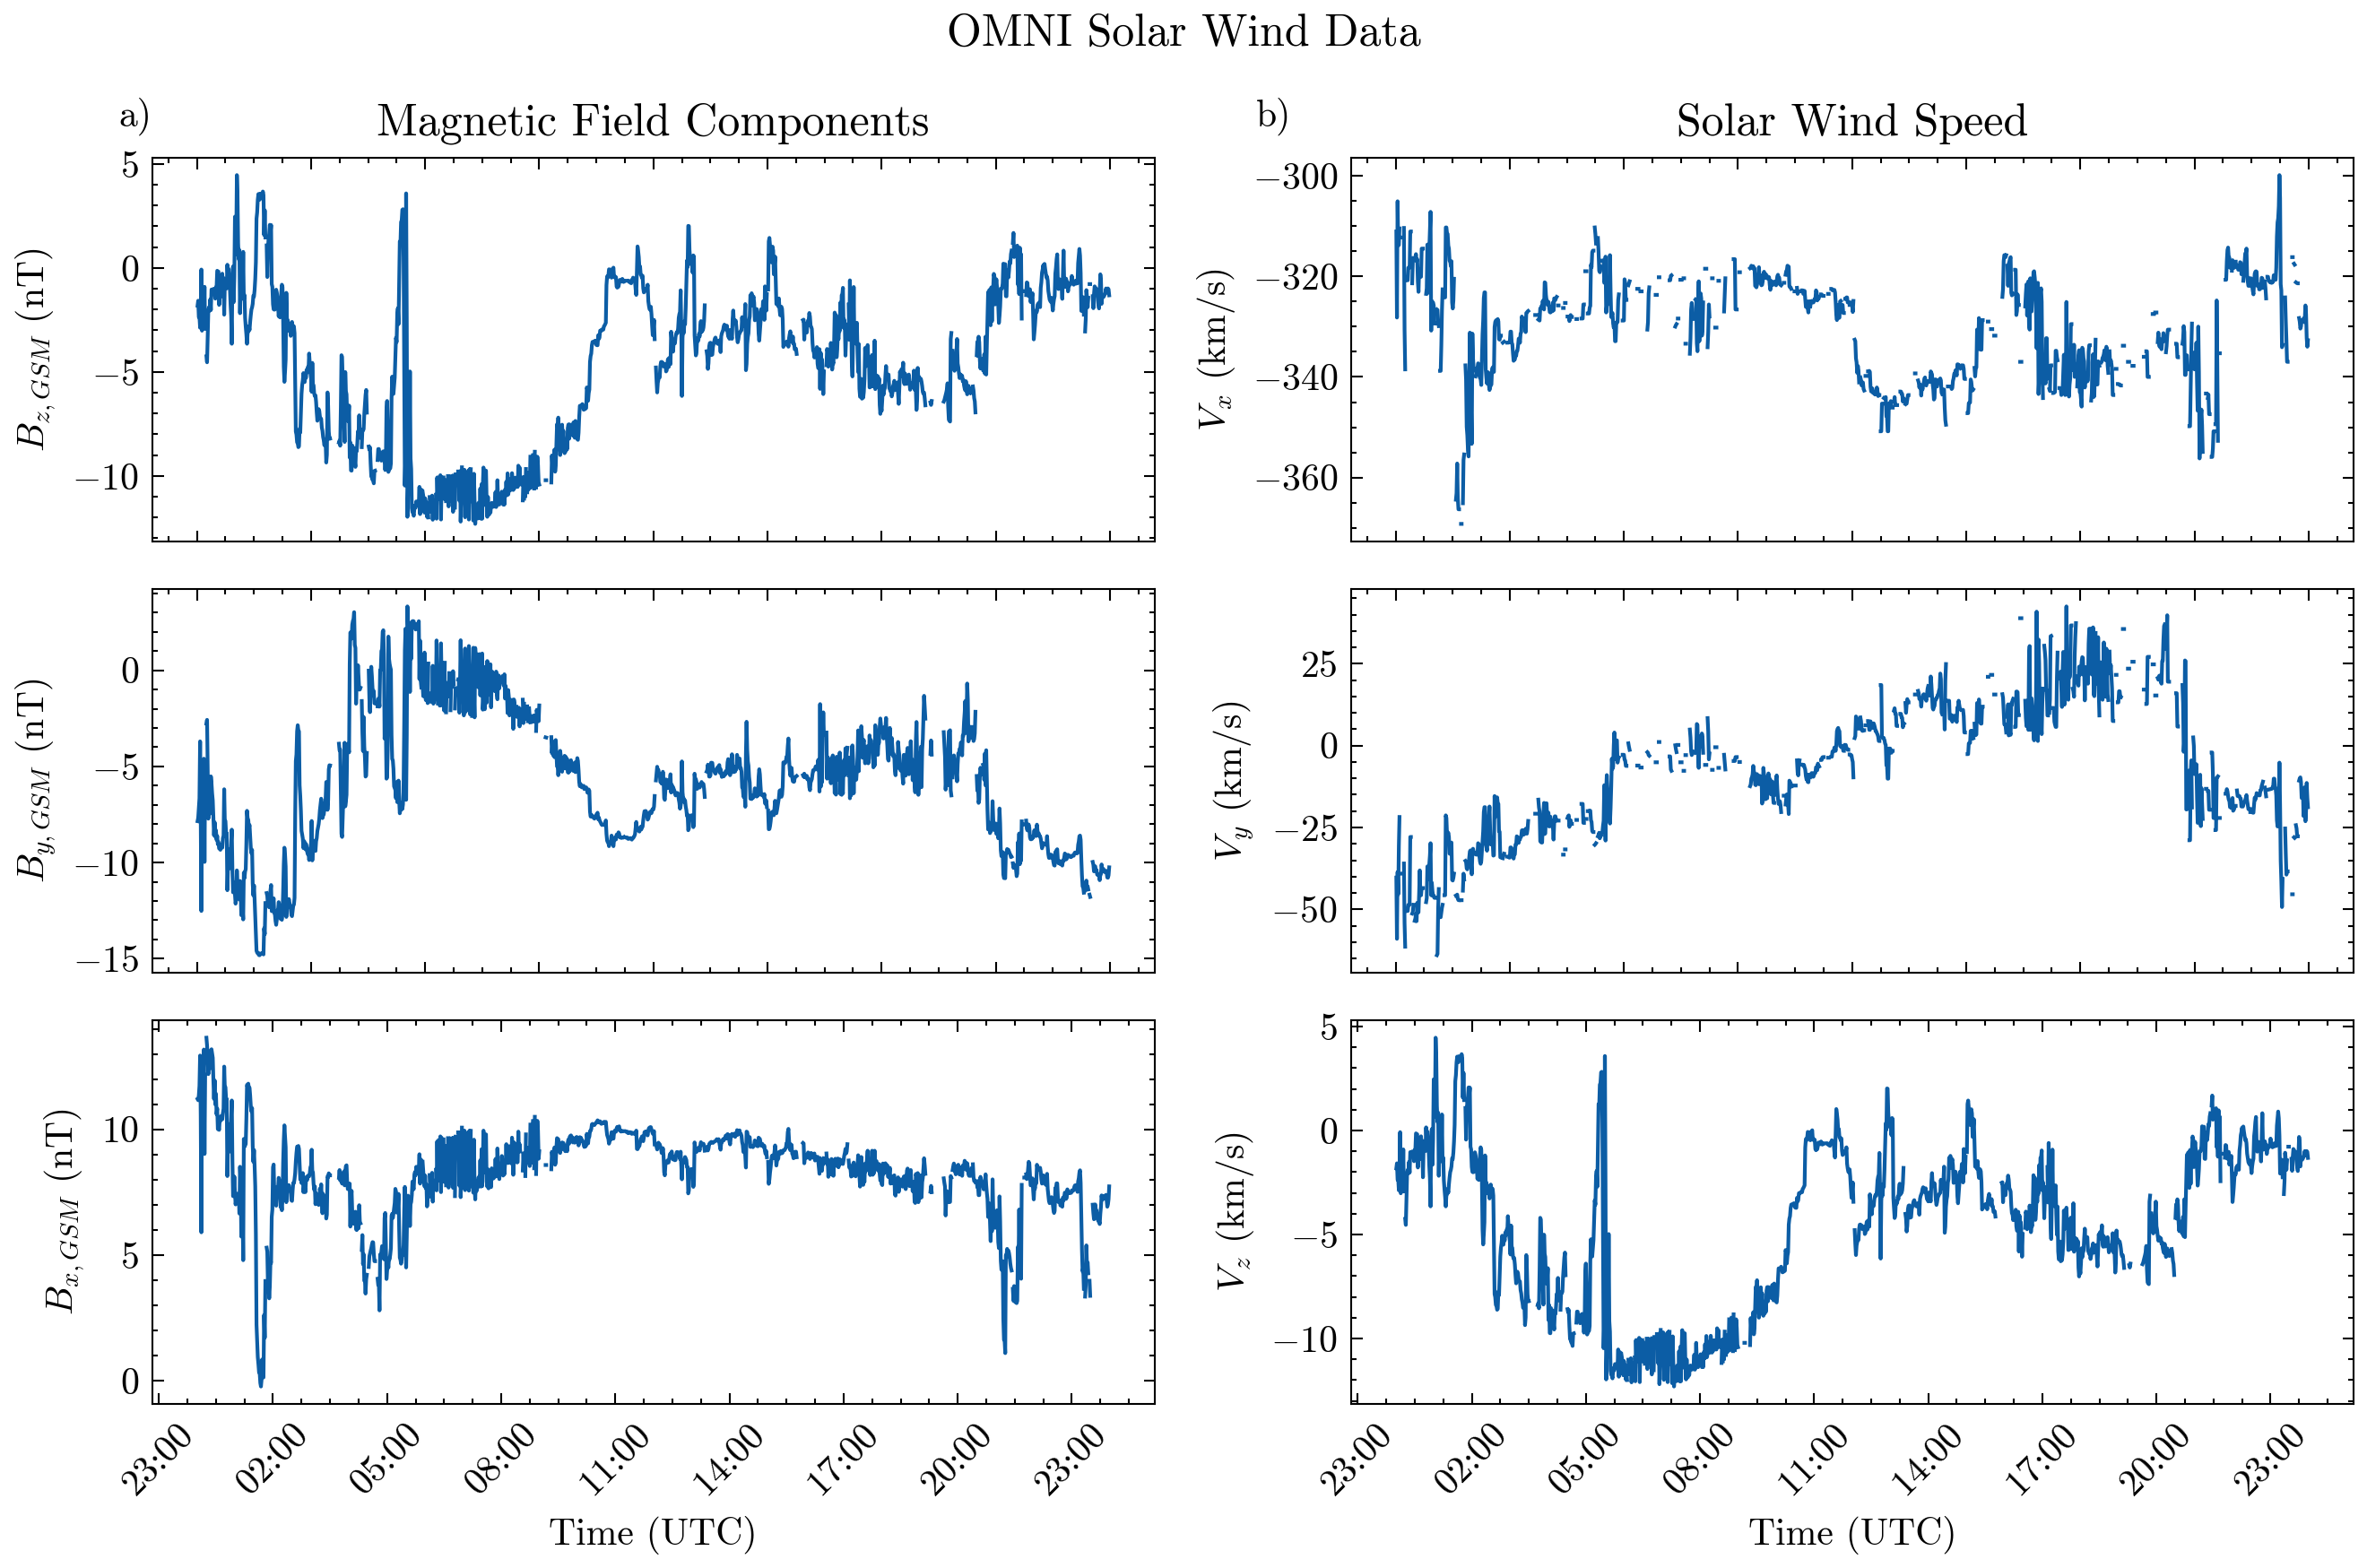

In [156]:
# File path for the data file
if 'google.colab' in str(get_ipython()):
  file_name = '/content/AuroralSpiralsPaper2025/Data_files/Data_files/omni_min_WXviKrUQax.lst'
else:
  file_name = '../Data_files\omni_min_WXviKrUQax.lst'

# Read the data
year, doy, hour, minute, bx, by, bz, vx, vy,vz = read_data(file_name)

# Plot the data
plot_data(year, doy, hour, minute, bx, by, bz, vx,vy,vz)

